# Corpus size analysis
This notebook explores the effect of training corpus size on model performance.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from os import listdir
import json
from ast import literal_eval
import numpy as np

In order to get the data visualizeds in this notebook, the following algorithm was used:

```
for model in models:
    initial_train = pick 150 random docs
    test = pick 30 random docs
    dev = pick 20 random docs
    for subset_num in range(7):
        train = initial_train + 50 more random docs
        train model
        evaluate model
```
Documents were sampled without replacement, and there are no overlaps between any sets.

 ## Loading the data

Read in the test performance files:

In [2]:
test_perf_prefix = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/corpus_size_analysis/performance/'
test_perf_paths = {
    'bioinfer': 'bioinfer_all_test_30_performance.jsonl',
    'chemprot': 'chemprot_all_test_30_performance.jsonl',
    'scierc': 'scierc_all_test_30_performance.jsonl'
}
test_perf_dfs = {k: pd.read_csv(f'{test_perf_prefix}{v}') for k,v in test_perf_paths.items()}

Read in the reported validation scores:

In [3]:
def get_val_perfs(model_path, dset_name):
    """
    Get the reported mean validation F1 scores for a given set of models.

    parameters:
        model_path, str: path to models
        dset_name, str: name of dataset, should be substring at the beginning
            of the models of interest

    returns:
        val_perfs, df: rows are models, columns are ent and rel perfs
    """
    val_perfs_dict = {'model': [], 'ent_F1': [], 'rel_F1': []}
    for f in listdir(model_path):
        if dset_name in f and f.split('_')[-1].isdigit():
            val_perfs_dict['model'].append(f)
            with open(f'{model_path}/{f}/metrics.json') as myf:
                metric_json = json.load(myf)
            val_perfs_dict['ent_F1'].append(metric_json['best_validation__MEAN__ner_f1'])
            val_perfs_dict['rel_F1'].append(metric_json['best_validation_MEAN__relation_f1'])
    val_perfs = pd.DataFrame(val_perfs_dict)
    return val_perfs

In [4]:
model_path = '/mnt/home/lotrecks/Shiu_lab/dygiepp/models'
val_perf_dfs = {}
for dset_name in test_perf_paths.keys():
    val_perf_dfs[dset_name] = get_val_perfs(model_path, dset_name)

Check that those both look right:

In [5]:
test_perf_dfs['chemprot']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,chemprot_350.jsonl,chemprot_test_30.jsonl,0.879364,0.926087,0.901982,0.623624,0.689036,0.647041,"(0.8418554366898737, 0.9175020018016214)","(0.8923275722823454, 0.9548135852911134)","(0.8737090324796389, 0.9315244710821411)","(0.378155193236715, 0.8713571017826337)","(0.566640395629783, 0.8440366972477065)","(0.47212596465023654, 0.8026837060702875)"
1,chemprot_150.jsonl,chemprot_test_30.jsonl,0.862174,0.917195,0.888698,0.669007,0.501472,0.569629,"(0.8153720462543992, 0.9075812792180196)","(0.8863751115075825, 0.9449352364963576)","(0.8513911290322581, 0.92082149735195)","(0.4688551144196305, 0.8484166666666666)","(0.3962937272693187, 0.6246680906999671)","(0.44408983451536643, 0.6868691106234671)"
2,chemprot_200.jsonl,chemprot_test_30.jsonl,0.869212,0.899998,0.884189,0.655313,0.477039,0.548011,"(0.8202713597583378, 0.9084740696971363)","(0.8640133429375043, 0.9309394124847001)","(0.8522158156382251, 0.9136122074646664)","(0.4150663716814159, 0.8725129087779689)","(0.353548149705635, 0.6156084656084655)","(0.38390382659547423, 0.6877614230506933)"
3,chemprot_450.jsonl,chemprot_test_30.jsonl,0.890044,0.928522,0.908761,0.608681,0.686229,0.641063,"(0.8482428969497935, 0.9244229250493882)","(0.8942016948831093, 0.9552244293506806)","(0.8776883483877478, 0.9340730637349368)","(0.3636604743269367, 0.8430990783410138)","(0.5427217505854801, 0.808860457724094)","(0.43448390352741184, 0.8017779420218445)"
4,chemprot_500.jsonl,chemprot_test_30.jsonl,0.901750,0.939926,0.920330,0.704573,0.732644,0.715690,"(0.8659520446596718, 0.9318850036625719)","(0.9145519472488925, 0.9608717001231732)","(0.8973676654617992, 0.9403669697580406)","(0.5138258590342083, 0.8686505305039787)","(0.63125, 0.8354702194357366)","(0.5845717617129531, 0.8235663371795376)"
5,chemprot_400.jsonl,chemprot_test_30.jsonl,0.891900,0.931846,0.911332,0.634162,0.624829,0.624586,"(0.8501938507484168, 0.9291019904478199)","(0.9047747987689394, 0.956157921848554)","(0.8841369013251326, 0.9386271591398692)","(0.4503462929475588, 0.8099859494179044)","(0.5310474537037038, 0.7451001155179052)","(0.5052001745164441, 0.7444425599276345)"
6,chemprot_300.jsonl,chemprot_test_30.jsonl,0.880920,0.929093,0.904243,0.652787,0.637868,0.640861,"(0.837593512565751, 0.9215530786605126)","(0.9029683050637614, 0.9521076425824401)","(0.8775432952245991, 0.9303407641835337)","(0.4415396878928166, 0.8341360856269113)","(0.529804104477612, 0.7685782967032967)","(0.4981896551724138, 0.766044058942388)"
7,chemprot_250.jsonl,chemprot_test_30.jsonl,0.847191,0.938410,0.890303,0.580094,0.681077,0.621993,"(0.7966100230663568, 0.8944207702020202)","(0.9110811394761335, 0.9595705793249307)","(0.8562797462599627, 0.9217032202399176)","(0.3764529576436222, 0.7609413453650534)","(0.5390389447236181, 0.8710510863182619)","(0.45463395638629284, 0.7567013245976356)"


In [6]:
val_perf_dfs['chemprot']

,model,ent_F1,rel_F1
0,chemprot_train_300,0.881497,0.393443
1,chemprot_train_250,0.878728,0.358974
2,chemprot_train_200,0.876827,0.329787
3,chemprot_train_450,0.902490,0.520833
4,chemprot_train_350,0.887280,0.417062
5,chemprot_train_400,0.903427,0.458537
6,chemprot_train_150,0.899482,0.232044
7,chemprot_train_500,0.909469,0.553846


Define a docnum column on each so that we can plot them:

In [7]:
for dset, df in test_perf_dfs.items():
    df['docnum'] = df['pred_file'].str.split('_').str[1].str[:-6].astype(int)
    test_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)
for dset, df in val_perf_dfs.items():
    df['docnum'] = df['model'].str.split('_').str[2].astype(int)
    val_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)

In [8]:
test_perf_dfs['chemprot']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,chemprot_150.jsonl,chemprot_test_30.jsonl,0.862174,0.917195,0.888698,0.669007,0.501472,0.569629,"(0.8153720462543992, 0.9075812792180196)","(0.8863751115075825, 0.9449352364963576)","(0.8513911290322581, 0.92082149735195)","(0.4688551144196305, 0.8484166666666666)","(0.3962937272693187, 0.6246680906999671)","(0.44408983451536643, 0.6868691106234671)",150
1,chemprot_200.jsonl,chemprot_test_30.jsonl,0.869212,0.899998,0.884189,0.655313,0.477039,0.548011,"(0.8202713597583378, 0.9084740696971363)","(0.8640133429375043, 0.9309394124847001)","(0.8522158156382251, 0.9136122074646664)","(0.4150663716814159, 0.8725129087779689)","(0.353548149705635, 0.6156084656084655)","(0.38390382659547423, 0.6877614230506933)",200
2,chemprot_250.jsonl,chemprot_test_30.jsonl,0.847191,0.938410,0.890303,0.580094,0.681077,0.621993,"(0.7966100230663568, 0.8944207702020202)","(0.9110811394761335, 0.9595705793249307)","(0.8562797462599627, 0.9217032202399176)","(0.3764529576436222, 0.7609413453650534)","(0.5390389447236181, 0.8710510863182619)","(0.45463395638629284, 0.7567013245976356)",250
3,chemprot_300.jsonl,chemprot_test_30.jsonl,0.880920,0.929093,0.904243,0.652787,0.637868,0.640861,"(0.837593512565751, 0.9215530786605126)","(0.9029683050637614, 0.9521076425824401)","(0.8775432952245991, 0.9303407641835337)","(0.4415396878928166, 0.8341360856269113)","(0.529804104477612, 0.7685782967032967)","(0.4981896551724138, 0.766044058942388)",300
4,chemprot_350.jsonl,chemprot_test_30.jsonl,0.879364,0.926087,0.901982,0.623624,0.689036,0.647041,"(0.8418554366898737, 0.9175020018016214)","(0.8923275722823454, 0.9548135852911134)","(0.8737090324796389, 0.9315244710821411)","(0.378155193236715, 0.8713571017826337)","(0.566640395629783, 0.8440366972477065)","(0.47212596465023654, 0.8026837060702875)",350
5,chemprot_400.jsonl,chemprot_test_30.jsonl,0.891900,0.931846,0.911332,0.634162,0.624829,0.624586,"(0.8501938507484168, 0.9291019904478199)","(0.9047747987689394, 0.956157921848554)","(0.8841369013251326, 0.9386271591398692)","(0.4503462929475588, 0.8099859494179044)","(0.5310474537037038, 0.7451001155179052)","(0.5052001745164441, 0.7444425599276345)",400
6,chemprot_450.jsonl,chemprot_test_30.jsonl,0.890044,0.928522,0.908761,0.608681,0.686229,0.641063,"(0.8482428969497935, 0.9244229250493882)","(0.8942016948831093, 0.9552244293506806)","(0.8776883483877478, 0.9340730637349368)","(0.3636604743269367, 0.8430990783410138)","(0.5427217505854801, 0.808860457724094)","(0.43448390352741184, 0.8017779420218445)",450
7,chemprot_500.jsonl,chemprot_test_30.jsonl,0.901750,0.939926,0.920330,0.704573,0.732644,0.715690,"(0.8659520446596718, 0.9318850036625719)","(0.9145519472488925, 0.9608717001231732)","(0.8973676654617992, 0.9403669697580406)","(0.5138258590342083, 0.8686505305039787)","(0.63125, 0.8354702194357366)","(0.5845717617129531, 0.8235663371795376)",500


In [9]:
val_perf_dfs['chemprot']

,model,ent_F1,rel_F1,docnum
0,chemprot_train_150,0.899482,0.232044,150
1,chemprot_train_200,0.876827,0.329787,200
2,chemprot_train_250,0.878728,0.358974,250
3,chemprot_train_300,0.881497,0.393443,300
4,chemprot_train_350,0.887280,0.417062,350
5,chemprot_train_400,0.903427,0.458537,400
6,chemprot_train_450,0.902490,0.520833,450
7,chemprot_train_500,0.909469,0.553846,500


SciERC didn't have enough documents to do the 500 doc training set, so we need to add a phantom row to avoid issues when plotting:

In [30]:
test_perf_dfs['scierc'].loc[7] = ['scierc_500.jsonl', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, '(0, 0)', '(0, 0)', '(0, 0)', '(0, 0)', 500]
val_perf_dfs['scierc'].loc[7] = ['scierc_train_500', np.nan, np.nan, 500]

In [31]:
test_perf_dfs['scierc']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,scierc_150.jsonl,scierc_test_30.jsonl,0.800719,0.801476,0.800866,0.498953,0.327913,0.394623,"(0.7400441352652637, 0.8519198583559423)","(0.7544092439069999, 0.8503267634854771)","(0.7538940506883299, 0.8462193701316765)","(0.4230902777777778, 0.5775924203673564)","(0.257421358397884, 0.40437753036437246)","(0.325018315018315, 0.4543524416135881)",150
1,scierc_200.jsonl,scierc_test_30.jsonl,0.796934,0.802077,0.799294,0.568836,0.348002,0.430818,"(0.7418686769149915, 0.8401993754503962)","(0.7593578103951504, 0.8452634670621502)","(0.7561194270403128, 0.8388998514253878)","(0.4782371569317382, 0.6677208835341365)","(0.2738851734053677, 0.43056166715098176)","(0.3552567265617726, 0.5108779198747226)",200
2,scierc_250.jsonl,scierc_test_30.jsonl,0.801268,0.804773,0.802871,0.522855,0.416126,0.462291,"(0.7448036006546644, 0.8504267161410018)","(0.7466650288552592, 0.8621822737207352)","(0.7528184267469982, 0.8505219119701298)","(0.45754716981132076, 0.5966467494658746)","(0.3333333333333333, 0.5064569083447332)","(0.3928095805092508, 0.5329703323349022)",250
3,scierc_300.jsonl,scierc_test_30.jsonl,0.780215,0.809228,0.794280,0.569947,0.442241,0.497335,"(0.7229409857328145, 0.8325346761103732)","(0.7657395348837209, 0.848574647887324)","(0.7486628339794279, 0.8366559104602227)","(0.5046269296740995, 0.6363636363636364)","(0.3688360967400112, 0.534753038780629)","(0.43015887321042334, 0.5750905797101449)",300
4,scierc_350.jsonl,scierc_test_30.jsonl,0.772007,0.815194,0.792775,0.585753,0.392072,0.468956,"(0.7183164538109246, 0.8228611990318376)","(0.7764652871650896, 0.8485476323331727)","(0.754140004974337, 0.8323409038303722)","(0.510749449785706, 0.6588949336960217)","(0.3283751756827514, 0.46680285343709466)","(0.4061667195431472, 0.5336927223719677)",350
5,scierc_400.jsonl,scierc_test_30.jsonl,0.792849,0.804566,0.798524,0.609943,0.501258,0.549427,"(0.7409482109227872, 0.8417228539800744)","(0.7557476129342855, 0.845764467983873)","(0.7509179154179154, 0.841332440322921)","(0.5414930289566416, 0.6811784692417739)","(0.4144354278340282, 0.6034820064505176)","(0.4778108225736254, 0.6276478990596357)",400
6,scierc_450.jsonl,scierc_test_30.jsonl,0.784321,0.806498,0.795078,0.565609,0.438104,0.493011,"(0.7269960083670767, 0.8361662352602819)","(0.7589007576114065, 0.8553195832331636)","(0.7491188458552819, 0.8425327937430435)","(0.48457741792369124, 0.6501302083333332)","(0.3666591757071261, 0.5177757793764988)","(0.4231544505801932, 0.568445876118648)",450
7,scierc_500.jsonl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)",500


In [32]:
val_perf_dfs['scierc']

,model,ent_F1,rel_F1,docnum
0,scierc_train_150,0.614173,0.309091,150
1,scierc_train_200,0.593320,0.303318,200
2,scierc_train_250,0.595661,0.309735,250
3,scierc_train_300,0.636364,0.394366,300
4,scierc_train_350,0.630975,0.392523,350
5,scierc_train_400,0.648221,0.393013,400
6,scierc_train_450,0.610568,0.394737,450
7,scierc_train_500,NaN,NaN,500


## Plot

Now, we need to `literal_eval` the confidence intervals on the test set and get them into a useable format, and then plot:

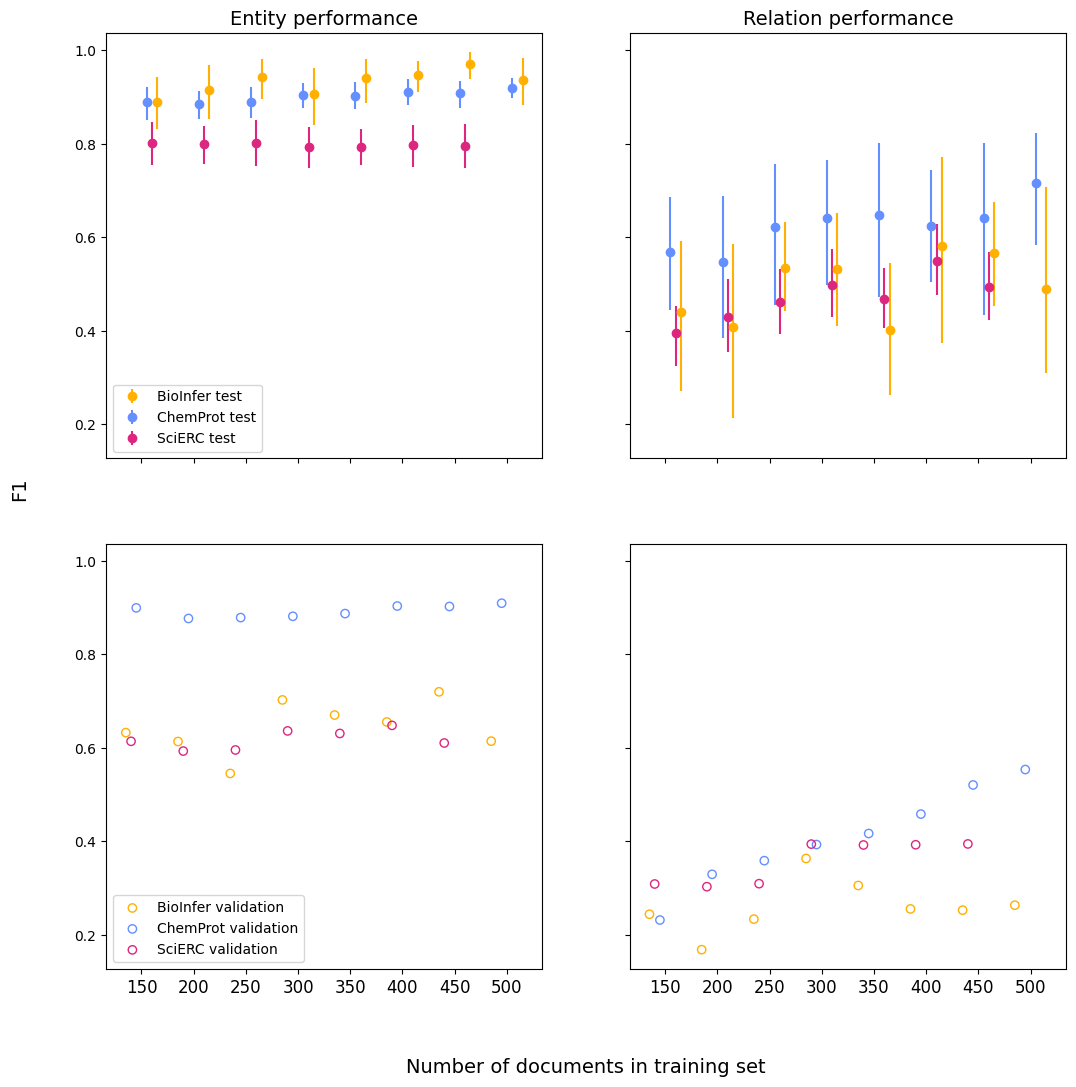

In [42]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))

# Colors from the IBM palette
colors = {'chemprot': '#648FFF',
         'scierc': '#DC267F',
         'bioinfer': '#FFB000'}
offset = {'chemprot': 0.1,
         'scierc': 0.2,
         'bioinfer': 0.3}
labels = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer'}

name_x = [150, 200, 250, 300, 350, 400, 450, 500]
x = np.arange(len(name_x))

for dset_name in test_perf_dfs.keys():
    # Get data for this dataset
    test_df = test_perf_dfs[dset_name]
    val_df = val_perf_dfs[dset_name]
    # Plot entity performance
    ent_CIs = test_df.ent_F1_CI.apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[test_df['ent_F1'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - test_df['ent_F1'][i] for i, val in enumerate(ent_CIs)]])
    axs[0,0].errorbar(x + offset[dset_name], test_df['ent_F1'], yerr=ent_CIs.to_numpy(), fmt='o', color=colors[dset_name], label=f'{labels[dset_name]} test')   
    axs[1,0].scatter(x - offset[dset_name], val_df['ent_F1'], color=colors[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    # Plot relation performance
    rel_CIs = test_df.rel_F1_CI.apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[test_df['rel_F1'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - test_df['rel_F1'][i] for i, val in enumerate(rel_CIs)]])
    axs[0,1].errorbar(x + offset[dset_name], test_df['rel_F1'], yerr=rel_CIs.to_numpy(), fmt='o', color=colors[dset_name], label=f'{labels[dset_name]} test')
    axs[1,1].scatter(x - offset[dset_name], val_df['rel_F1'], color=colors[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    
axs[0,0].set_xticks(x, name_x, size=12)
axs[0,1].set_xticks(x, name_x, size=12)
axs[1,0].set_xticks(x, name_x, size=12)
axs[1,1].set_xticks(x, name_x, size=12)
axs[0,0].set_title('Entity performance', size=14)
axs[0,1].set_title('Relation performance', size=14)
axs[0,0].legend(loc='lower left')
axs[1,0].legend(loc='lower left')
fig.supxlabel('Number of documents in training set', size=14)
fig.supylabel('F1', size=14)
fig.subplots_adjust(bottom=0.1, left=0.1)

Note that the validation set scores are those directly reported form the model, and aren't calculated using the same code that the test set (which uses my own `evaluate_model_output.py`), and so aren't directly comparable.

TODO: Add validation set to eval with my own code